In [62]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [63]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [64]:
# Combine the data into a single dataset

combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [65]:
# Checking the number of mice.

combined_df["Mouse ID"].value_counts()

g989    13
r604    10
k894    10
j913    10
m957    10
        ..
n482     1
o848     1
h428     1
d133     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [66]:
# Checking duplicated mice with time point

duplicate_mouse = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"],keep = False)]
duplicate_mouse_id= duplicate_mouse["Mouse ID"].unique()
dup_mouse_id=(duplicate_mouse_id[0])

In [67]:
combined_df = (combined_df.loc[combined_df["Mouse ID"] != dup_mouse_id,:])

In [68]:
# Checking the new dataframe for dropped duplicates
combined_df["Mouse ID"].value_counts()

z795    10
d251    10
m957    10
j913    10
c757    10
        ..
x226     1
h428     1
l872     1
o848     1
n482     1
Name: Mouse ID, Length: 248, dtype: int64

In [69]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})

# Print new dataframe summary
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [70]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

bar_plot_df = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()

regimen_datapoints = bar_plot_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})

# Set the index to be "Drug Regimen" to be used as labels
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")

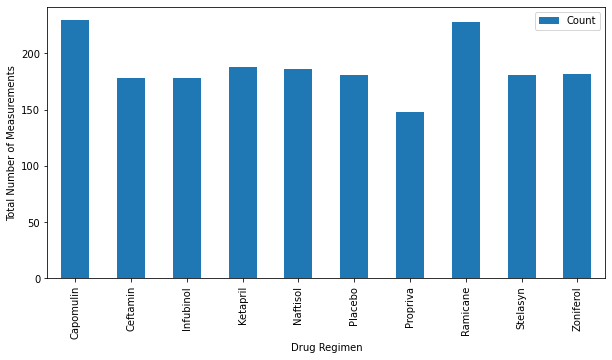

In [88]:
# Create a bar chart of the data
regimen_datapoints.plot(kind="bar", figsize=(10,5))

# Add axis names
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Measurements')



plt.show()

In [72]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.

# Convert drug regimes column to list here
drug_regimens = summary_df.index.tolist()
drug_regimens

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [75]:
# Set the x-axis to the contents of the list
regimen_count = (combined_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
regimen_count
x_axis = np.arange(len(regimen_count))

Text(0, 0.5, 'Total Number of Measurements')

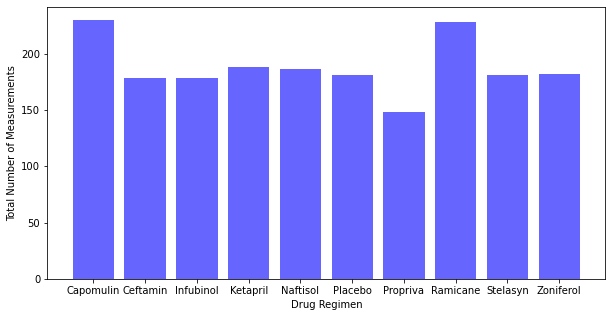

In [95]:
# Redefine x-axis and plot
x_axis = drug_regimens

plt.figure(figsize=(10,5))
plt.bar(x_axis, regimen_count, color='b', alpha=0.6, align="center")

# Add axis names
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Measurements')
